In [1]:
#import libraries
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#sourcing/reading the data
loan_df = pd.read_csv("loan.csv",low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#data info
loan_df.info()
loan_df.shape
loan_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [4]:
#data cleaning
#check for null values
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [5]:
#count the missing values in each column
print(loan_df.isnull().sum(axis=0))

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
#check how many rows have all missing values
loan_df.isnull().all(axis=1).sum()

0

In [7]:
#count the number of missing values in rows
print(loan_df.isnull().sum(axis=1))

0        58
1        57
2        59
3        56
4        55
5        58
6        57
7        57
8        58
9        57
10       57
11       58
12       57
13       57
14       58
15       58
16       57
17       57
18       56
19       58
20       57
21       57
22       57
23       58
24       58
25       58
26       58
27       56
28       57
29       57
         ..
39687    59
39688    61
39689    59
39690    59
39691    59
39692    60
39693    59
39694    59
39695    59
39696    59
39697    59
39698    59
39699    59
39700    60
39701    59
39702    59
39703    59
39704    60
39705    59
39706    60
39707    59
39708    59
39709    60
39710    60
39711    59
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64


In [8]:
#percentage of the missing values column wise
round(100*(loan_df.isnull().sum()/len(loan_df.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [9]:
#removing the columns having huge percentage of missing values
#loan_df = loan_df.drop('total_il_high_credit_limit',axis = 1)
#loan_df = loan_df.drop('total_bc_limit',axis=1)
#loan_df = loan_df.drop('total_bal_ex_mort',axis=1)
#loan_df = loan_df.drop('tot_hi_cred_lim',axis=1)
#loan_df = loan_df.drop('percent_bc_gt_75',axis=1)
#loan_df = loan_df.drop('pct_tl_nvr_dlq',axis=1)
#loan_df = loan_df.drop('num_tl_op_past_12m',axis = 1)
#loan_df = loan_df.drop('num_tl_90g_dpd_24m',axis = 1)
#loan_df = loan_df.drop('num_tl_30dpd',axis = 1)
#loan_df = loan_df.drop('num_tl_120dpd_2m',axis = 1)
#loan_df = loan_df.drop('num_sats',axis=1)
#loan_df = loan_df.drop('num_rev_tl_bal_gt_0',axis=1)
#loan_df = loan_df.drop('num_rev_accts',axis=1)
#loan_df = loan_df.drop('num_op_rev_tl',axis=1)
#loan_df = loan_df.drop('num_il_tl',axis = 1)
#loan_df = loan_df.drop('num_bc_tl',axis = 1)
#loan_df = loan_df.drop('num_bc_sats',axis =1)
#loan_df = loan_df.drop('num_actv_rev_tl',axis=1)
#loan_df = loan_df.drop('num_accts_ever_120_pd',axis = 1)
#loan_df = loan_df.drop('mths_since_recent_revol_delinq',axis=1)
#loan_df = loan_df.drop('mths_since_recent_inq',axis=1)
#loan_df = loan_df.drop('mths_since_recent_bc_dlq',axis=1)
#loan_df = loan_df.drop('mths_since_recent_bc',axis=1)
#loan_df = loan_df.drop('mort_acc',axis=1)
#loan_df = loan_df.drop('mo_sin_rcnt_tl',axis=1)
#loan_df = loan_df.drop('mo_sin_rcnt_rev_tl_op',axis=1)
#loan_df = loan_df.drop('mo_sin_old_rev_tl_op',axis=1)
loan_df = loan_df.drop(['mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq',
               'mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_rev_tl','num_bc_sats','num_bc_tl',
               'num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',
               'num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit',
               'num_actv_bc_tl','mo_sin_old_il_acct','bc_util','bc_open_to_buy','avg_cur_bal','acc_open_past_24mths','inq_last_12m',
               'total_cu_tl','inq_fi','total_rev_hi_lim','all_util','max_bal_bc','open_rv_24m','open_rv_12m','il_util','total_bal_il','mths_since_rcnt_il',
                'open_il_6m','open_il_24m','open_il_12m','open_il_6m','open_acc_6m','tot_cur_bal','tot_coll_amt','verification_status_joint',
               'dti_joint','annual_inc_joint','mths_since_last_major_derog','next_pymnt_d','mths_since_last_record'],axis=1)
#loan_df = loan_df.drop('columns_drop',axis=1)

loan_df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
round(100*(loan_df.isnull().sum()/len(loan_df.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
loan_df = loan_df.drop('mths_since_last_delinq',axis=1)
loan_df.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
#drop the rows with huge missing values
loan_df = loan_df.dropna(subset=['desc'])
loan_df.isnull().sum(axis=0)

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     1604
emp_length                     630
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
desc                             0
purpose                          0
title                            6
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc            

In [13]:
#drop duplicate rows
loan_df = loan_df.drop_duplicates(keep = 'first')
loan_df.shape

(26777, 54)

In [14]:
#Data Analysis
#creating a new column default for analysis

loan_df.head()

loan_df=loan_df[loan_df.loan_status != 'Current']
loan_df['loan_status']
default = []
for i in loan_df['loan_status']:
    if i == 'Fully Paid':
        default.append(0)
    elif i == 'Charged Off':
        default.append(1)
loan_df['default']= default
loan_df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,default
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0


<function matplotlib.pyplot.show(*args, **kw)>

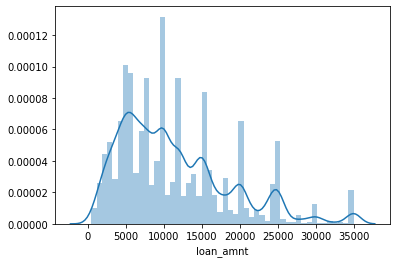

In [15]:
#univariate analysis
#univariate analysis for categorical data are done in excel
#related graphs are provided in ppt
import seaborn as sns

sns.distplot(loan_df['loan_amnt'])
plt.show


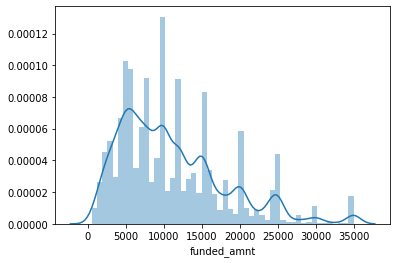

In [16]:
sns.distplot(loan_df['funded_amnt'])
plt.show()

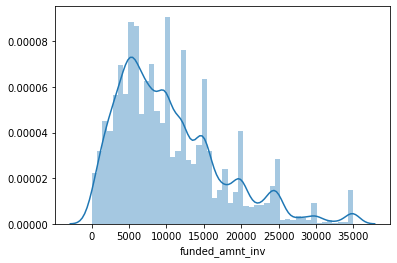

In [17]:
sns.distplot(loan_df['funded_amnt_inv'])
plt.show()

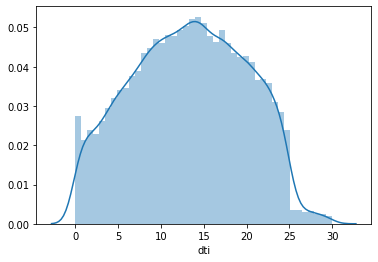

In [19]:
sns.distplot(loan_df['dti'])
plt.show()

In [20]:
#Bivariate Analysis
#calculating the correlation between funded_amnt_inv and dti
loan_df['funded_amnt_inv'].corr(loan_df['dti'])

0.081407219355591

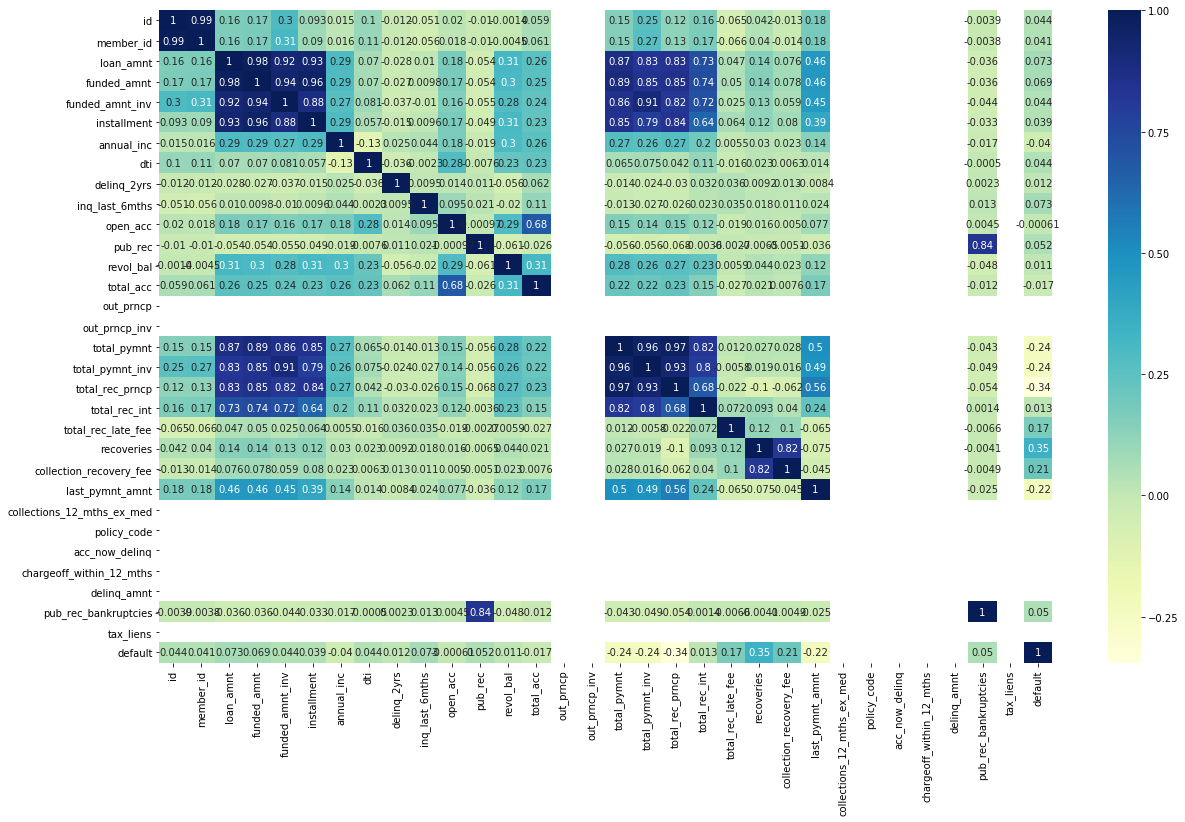

In [21]:
cor = loan_df.corr()
plt.figure(figsize=(20,12))
round(cor,3)
#check the correlation of different variables using heatmap
sns.heatmap(cor,cmap='YlGnBu',annot = True)
#plt.yscale('log')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

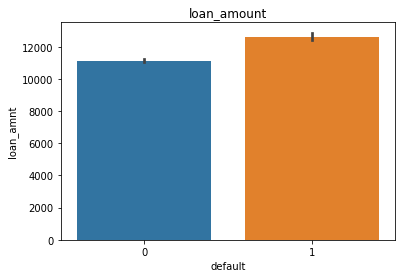

In [22]:
#Bivariate analysis
bins = 100
sns.barplot(x='default',y='loan_amnt',data = loan_df)
plt.title('loan_amount')
plt.show

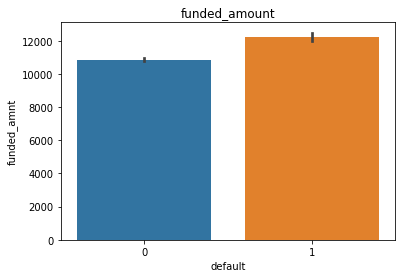

In [23]:
bins = 100
sns.barplot(x='default',y='funded_amnt',data=loan_df)
plt.title('funded_amount')
plt.show()

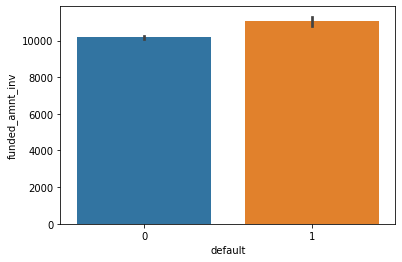

In [24]:
bins = 100
sns.barplot(x = 'default', y = 'funded_amnt_inv',data = loan_df)
plt.show()

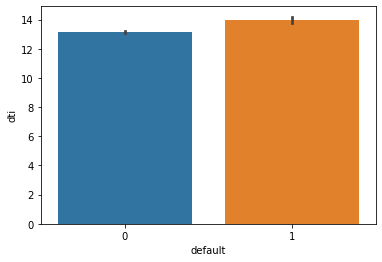

In [25]:
bins = 100
sns.barplot(x = 'default', y = 'dti',data = loan_df)
plt.show()

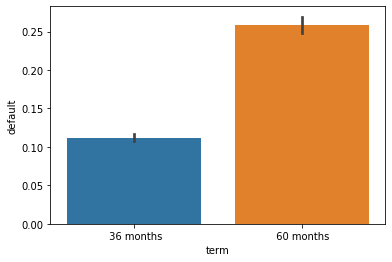

In [26]:
bins = 100
sns.barplot(x='term',y = 'default',data = loan_df)
plt.show()

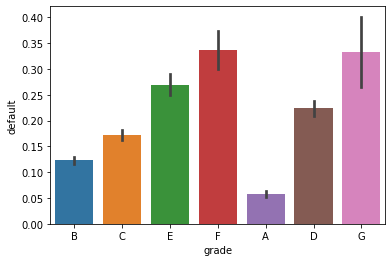

In [27]:
bins = 100
sns.barplot(x='grade',y = 'default',data = loan_df)
plt.show()

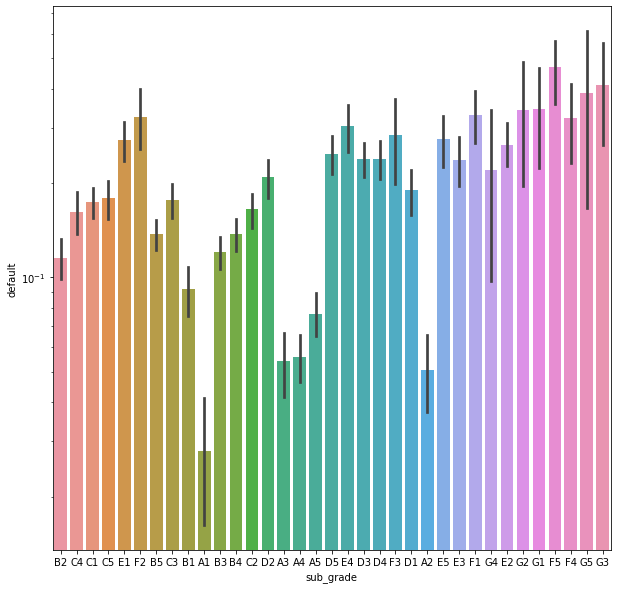

In [36]:
bins = 100
plt.figure(figsize=(10,10))
sns.barplot(x='sub_grade',y = 'default',data = loan_df)
plt.yscale('log')
plt.show()